In [2]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
sns.set(context= 'notebook', style= 'white', rc={'figure.figsize':(14,10)})
%matplotlib inline

In [6]:
%cd Z:\PPMI_Data\Excel_Data\NonMotors\Feature_CpG_Gene_Association\Other_Related_Files
df = pd.read_csv ('450Top50CpG_withMethylDetail.csv')
df.head(2)

Z:\PPMI_Data\Excel_Data\NonMotors\Feature_CpG_Gene_Association\Other_Related_Files


,Sentrix,PATNO,APPRDX,cg11677857,cg12809925,cg03476938,cg04471171,cg19555872,cg19924025,cg18357560,...,cg07448795,cg18704989,cg00984715,cg12969734,cg25700851,cg12342861,cg18473117,cg25135411,cg18920427,cg09233704
0,200973410159_R03C01,3000,2,0.0667,0.5555,0.6119,0.4616,0.9153,0.0304,0.8327,...,0.0145,0.0228,0.5868,0.9285,0.9147,0.9134,0.9672,0.9228,0.4620,0.7249
1,200991620021_R01C01,3001,1,0.1094,0.4483,0.5490,0.5212,0.8797,0.0172,0.7906,...,0.0187,0.0129,0.4464,0.8423,0.8668,0.9178,0.9388,0.8985,0.3566,0.6201


In [7]:
df.shape

(457, 332)

In [8]:
df_data = df.drop(['APPRDX', 'Sentrix', 'PATNO'], axis=1)
df_data.head(2)

,cg11677857,cg12809925,cg03476938,cg04471171,cg19555872,cg19924025,cg18357560,cg09168320,cg26672954,cg00141522,...,cg07448795,cg18704989,cg00984715,cg12969734,cg25700851,cg12342861,cg18473117,cg25135411,cg18920427,cg09233704
0,0.0667,0.5555,0.6119,0.4616,0.9153,0.0304,0.8327,0.8716,0.9334,0.0798,...,0.0145,0.0228,0.5868,0.9285,0.9147,0.9134,0.9672,0.9228,0.4620,0.7249
1,0.1094,0.4483,0.5490,0.5212,0.8797,0.0172,0.7906,0.2976,0.9266,0.0555,...,0.0187,0.0129,0.4464,0.8423,0.8668,0.9178,0.9388,0.8985,0.3566,0.6201


In [9]:
df_targets = df[['APPRDX']]

In [10]:
colors = {1:"red", 2: "green"}

In [11]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [12]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='r', markersize=15, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='g', markersize=15, color='floralwhite')]

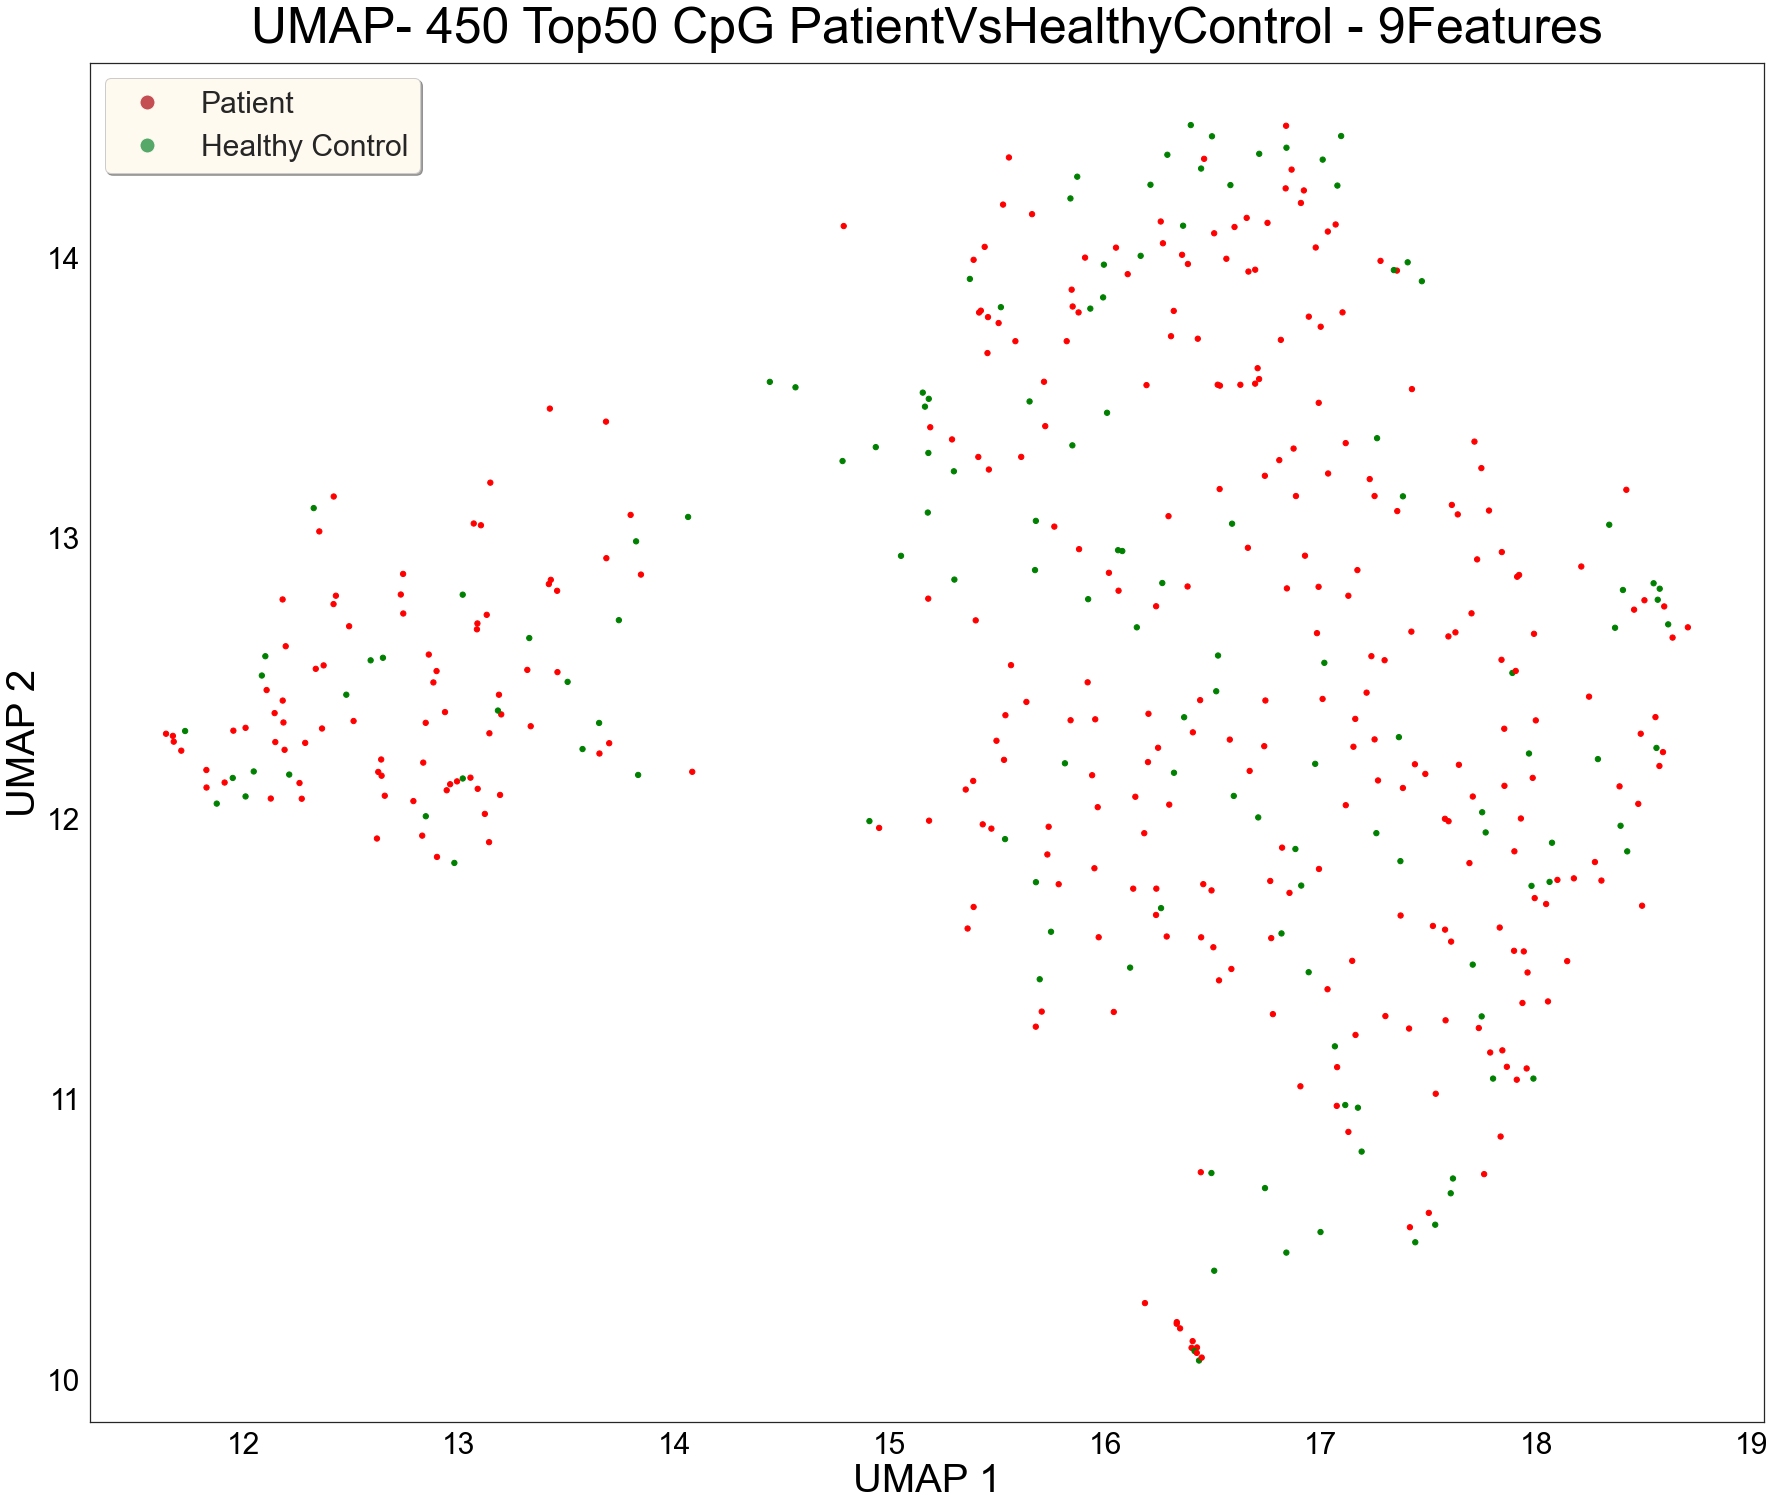

In [16]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=28, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "UMAP- 450 Top50 CpG PatientVsHealthyControl - 9Features", fontsize=50, color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=40, color='black')
plt.ylabel('UMAP 2', fontsize=40, color='black')
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 30})
plt.savefig("UMAP_450Top50_CpG_PatientVsHealthy.pdf", format="pdf")
plt.show()